# PIMA Indians Diabetes


## Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)




In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objects as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

df = pd.read_csv('/content/diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Predictive Modeling

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]


# Data Pre-processing
-  Glucose/BloodPressure/SkinThickness/Insulin/BMI has 0 values which is not possible. 
- We have to replace 0 values with either mean or median values of specific column

In [11]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())

# [문제 1]

BloodPressure/SkinThickness/Insulin/BMI의 0인 값들을 각 feature들의 평균값으로 대체하시오.(2점)

In [12]:
# BloodPressure

In [13]:
# SkinThickness

In [14]:
# Insulin

In [15]:
# BMI

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


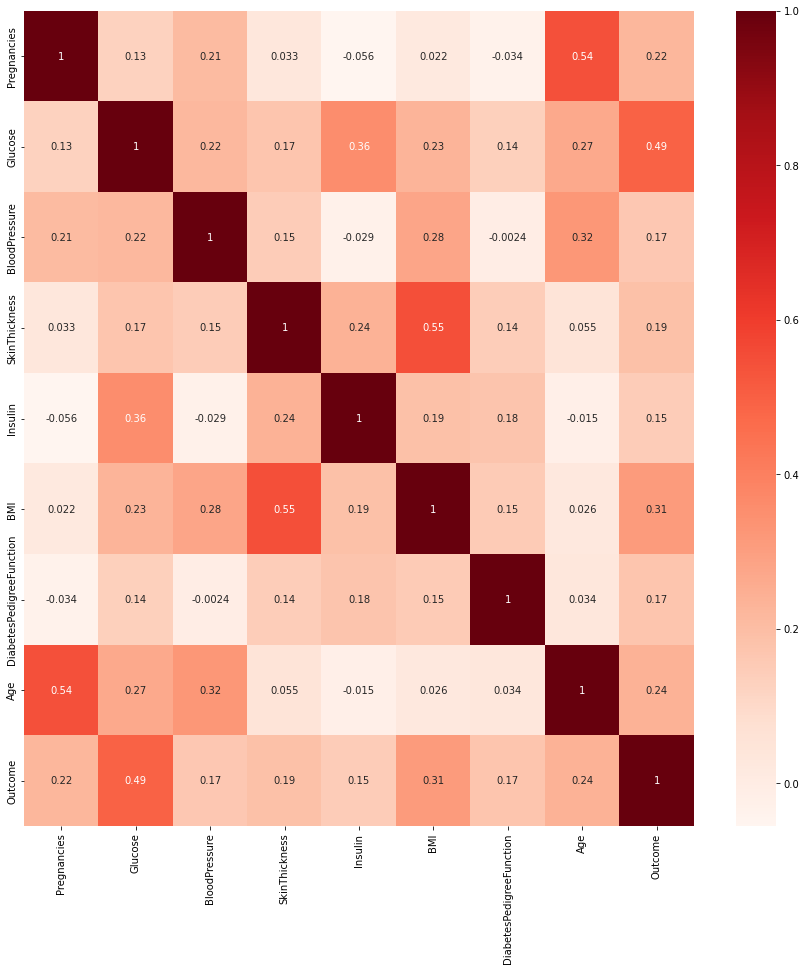

In [17]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')

In [18]:
scaler = StandardScaler()

standardisted = scaler.fit_transform(X)

X  = standardisted

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

576
576
192
192


## Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [33]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)
print(accuracy_score(y_test,y_pred))

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_pred, y_test)}")

Accuracy  80.20833333333334
0.8020833333333334
CONFUSION MATRIX:
[[118  26]
 [ 12  36]]


## Decision Tree

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

# [문제 2]

Decision Tree Model을 생성하고 accuracy와 confusion matrix를 구하는 프로그램을 완성하시오.[1점]

In [22]:
# Decision Tree Model

Accuracy  70.3125
CONFUSION MATRIX:
[[100  27]
 [ 30  35]]


# Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

# [문제 3] 

Random Forest Model을 생성하고 accuracy와 confusion matrix를 구하는 프로그램을 완성하시오.[1점]

In [23]:
# Random Forest Model


Accuracy  78.125
CONFUSION MATRIX:
[[113  25]
 [ 17  37]]


## Gradient Boosting




Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [29]:
# Gradient Boosting Model
GBC = GradientBoostingClassifier()

#fiting the model
GBC.fit(X_train, y_train)

#prediction
y_pred = GBC.predict(X_test)

#Accuracy
print("Accuracy ", GBC.score(X_test, y_test)*100)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_pred, y_test)}")

Accuracy  81.77083333333334
CONFUSION MATRIX:
[[118  23]
 [ 12  39]]


In [32]:
# AdaBoostClassifier Model

ABC = AdaBoostClassifier(n_estimators=30)
ABC.fit(X_train, y_train)

y_pred = ABC.predict(X_test)

print("Accuracy ", ABC.score(X_test, y_test)*100)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_pred, y_test)}")

Accuracy  76.5625
CONFUSION MATRIX:
[[111  26]
 [ 19  36]]


# Voting model

In [34]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC()
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

print("Accuracy ", voting.score(X_test, y_test)*100)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_pred, y_test)}")


Accuracy  79.6875
CONFUSION MATRIX:
[[118  27]
 [ 12  35]]


# Bagging Model

In [35]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

print("Accuracy ", bagging.score(X_test, y_test)*100)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_pred, y_test)}")

Accuracy  80.72916666666666
CONFUSION MATRIX:
[[114  21]
 [ 16  41]]
